### Predict A Doctor’s Consultation Fee is about predicting the fee a doctor will charge for consultation.

In [167]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [327]:
#Loading the dataset
df_train=pd.read_excel("Final_Train.xlsx")
df_test=pd.read_excel("Final_Test.xlsx")
df=pd.concat([df_train,df_test])
df=df_train

In [230]:
#Seeing the first five rows of dataset
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0


In [231]:
# Check shape of train and test dataset

print('Train Data:',df_train.shape)
print('\n')
print('Test Data:',df_test.shape)

Train Data: (5961, 7)


Test Data: (1987, 6)


In [232]:
#Checking the columns of data 
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [233]:
#Checking the datatypes of the columns
df.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dtype: object

In [342]:
for i in df.columns:
    print("Unique values in", i ,":", df[i].nunique())

Unique values in Qualification : 1801
Unique values in Experience : 64
Unique values in Rating : 52
Unique values in Place : 948
Unique values in Profile : 6
Unique values in Miscellaneous_Info : 3980
Unique values in Fees : 40


In [234]:
#Check for any Null Values
df.isnull().values.any()

True

In [235]:
#Checking the null values in columns
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

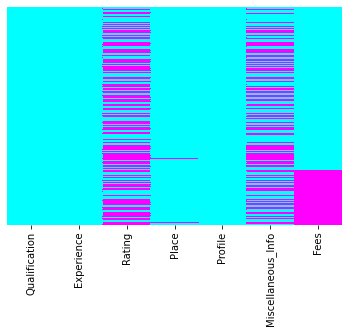

In [236]:
#Now again checking it via visualisation
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')
plt.show()

##### Observation:

      Here we see that there are many null values in Rating,Place and Miscellaneous_info column so we have to impute them .

In [348]:
#First we remove the"%" from Rating column
df["Rating"]=df["Rating"].str.strip("%")

In [349]:
#Replace the null values in Rating with 0
df["Rating"].fillna(0,inplace=True)

In [350]:
#Converting into int datatype
df["Rating"]=df["Rating"].astype(int)

In [351]:
# Extract years of experience from Experience column and converting its datatype into int .
df["Experience"] = df["Experience"].str.split()
df["Experience"] = df["Experience"].str[0].astype("int")

In [352]:
#Again checking for null values 
df.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

In [353]:
#Now in Place column there are missing values which needs to be imputed
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
df['Place']=imp.fit_transform(df['Place'].values.reshape(-1,1))

##### Observation:
In Miscellaneous_Info column we see mainly there are information about Rating and Place.
And we have seprate column for Rating and Place .So we will drop miscellaneous_info column as it is of no use.

In [354]:
#Dropping Miscellaneous column
df.drop(columns=["Miscellaneous_Info"],inplace=True)

In [355]:
#Checking Null Values again
df.isnull().sum()

Qualification       0
Experience          0
Rating              0
Place               0
Profile             0
Fees             1987
dtype: int64

##### Observation:
Now there is no null values present in the dataset .

In [356]:
#Now we will divide the Place column into multiple columns
df['City'] = df['Place'].str.split(',').str[1]
df['Area'] = df['Place'].str.split(',').str[0]

## Handling Categorical Data

In [357]:
Qual_list=[]
for row in df['Qualification']:
    Qual_list.append(list(row.lower().split(',')))
df['Qualification']=Qual_list

In [358]:
df_Qual=df.Qualification.apply(lambda x:x[0])

In [359]:
#Now drop Place column
df.drop(columns=["Place"],inplace=True)

In [360]:
#Checking the information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Qualification  7948 non-null   object 
 1   Experience     7948 non-null   int32  
 2   Rating         7948 non-null   int32  
 3   Profile        7948 non-null   object 
 4   Fees           5961 non-null   float64
 5   City           7947 non-null   object 
 6   Area           7948 non-null   object 
dtypes: float64(1), int32(2), object(4)
memory usage: 594.7+ KB


##### Observation:

    1.All the columns are object data type except Rating,Experience and Fees column .
    
    2.Before going further we have to change the object datatypes of columns to int and float datatypes as our model does 
      not understand string values.

## Data Visualisation

<Figure size 1440x576 with 0 Axes>

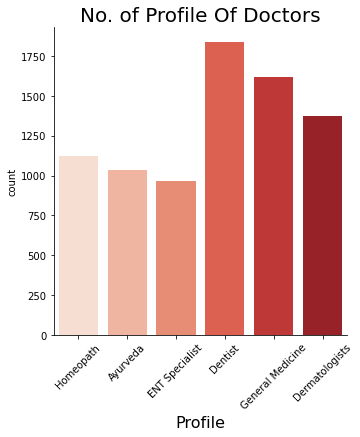

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64


In [343]:
plt.figure(figsize=(20,8))
sns.catplot(x='Profile', data=df, palette="Reds",kind='count')
plt.xlabel("Profile", fontsize=16)
plt.title("No. of Profile Of Doctors", fontsize=20)
plt.xticks(rotation=45)
plt.show()

print(df['Profile'].value_counts())

##### Observation:

        We see maximum dentists are present in the list , followed by General Medicine and Dermatologists.
     

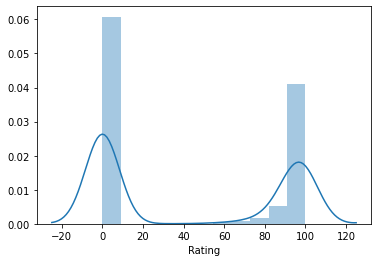

In [228]:
sns.distplot(df['Rating'])

##### Observation:
    
    1.From above ,we see that number of Dentist and General Medicine are more than other profiles.
    
    2.ENT specialist are very less overall.

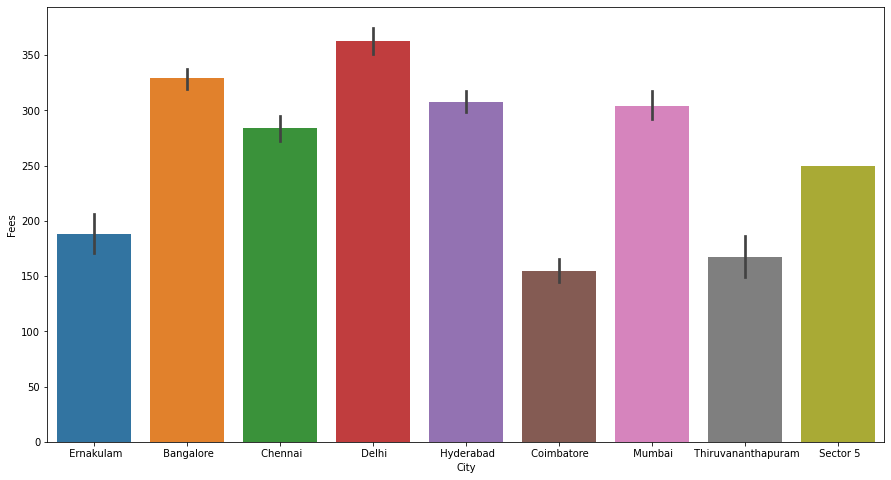

In [80]:
plt.figure(figsize=(15,8))
sns.barplot(x="City",y="Fees",data=df)
plt.show()

##### Observation:

    In Delhi Fees Charged by doctors is maximum compared to other cities.

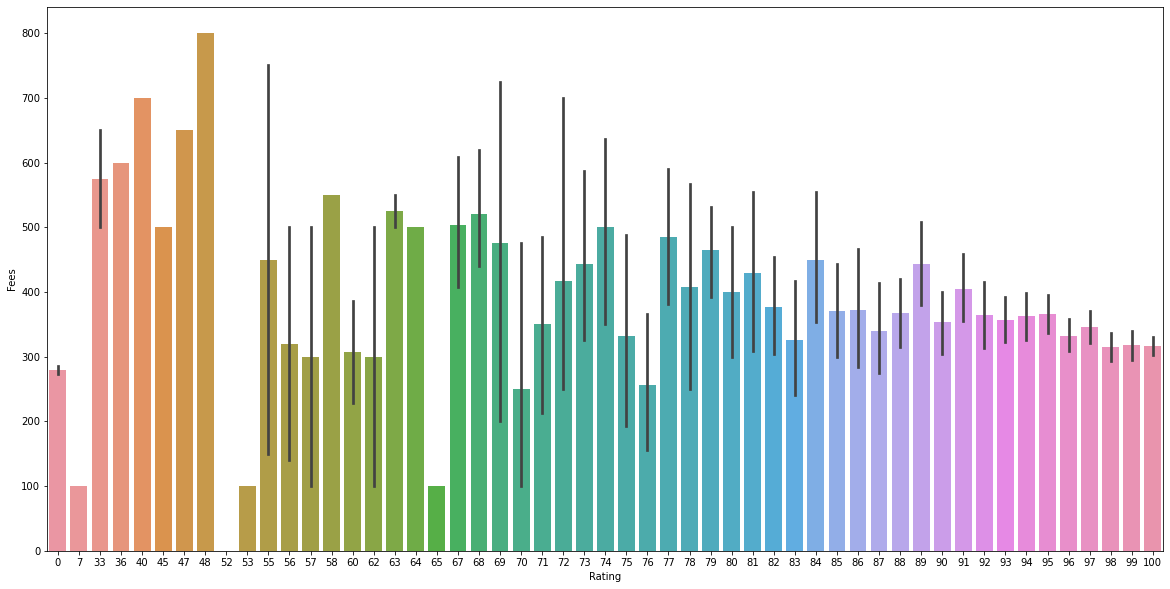

In [81]:
plt.figure(figsize=(20,10))
sns.barplot(x="Rating",y="Fees",data=df)
plt.show()

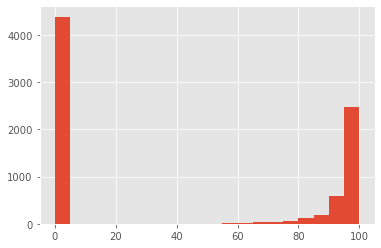

In [366]:
plt.style.use('ggplot')
x = df["Rating"]
plt.hist(x,bins = 20)
plt.show()

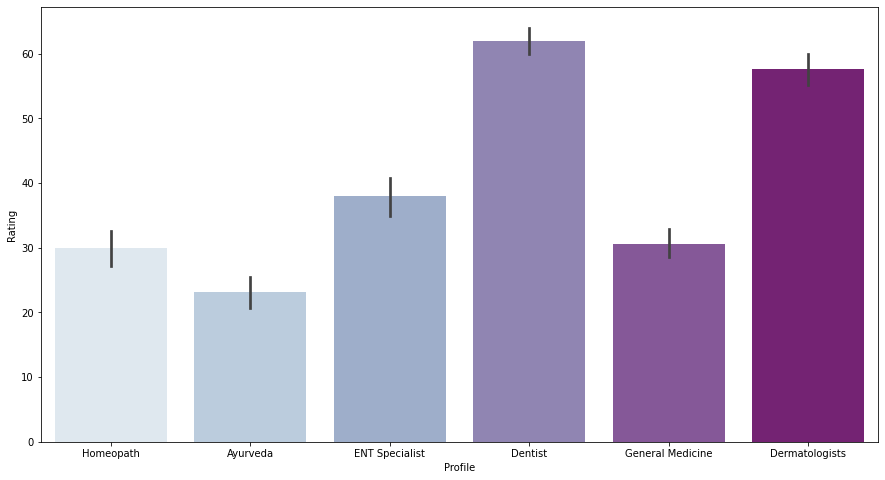

In [361]:
plt.figure(figsize=(15,8))
sns.barplot(x="Profile",y='Rating',data=df,palette='BuPu')
plt.show()

##### Observation:
    It is observed that Dentist and Dermatologists have high ratings than others .

<Figure size 1440x720 with 0 Axes>

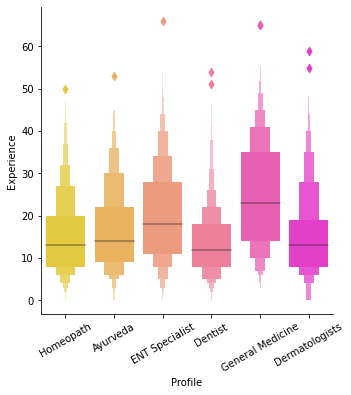

In [365]:
plt.figure(figsize=(20,10))
sns.catplot(x="Profile",y='Experience',data=df,kind='boxen',palette='spring_r')
plt.xticks(rotation=30)
plt.show()

##### Observation:

    1.General Medicine and ENT specialist has more experience than others.
    
    2.We see some outliers are present which needs to be imputed.
    
    

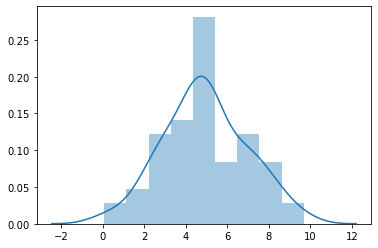

In [31]:
c=np.random.normal(loc=5,size=100,scale=2)
sns.distplot(c)

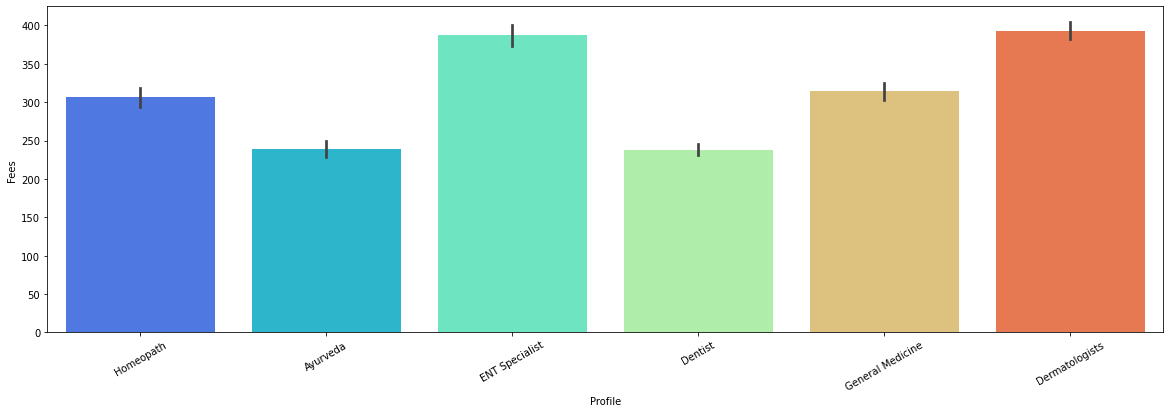

In [32]:
plt.figure(figsize=(20,6))
sns.barplot(x='Profile',y='Fees',data=df,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

##### Observation:
     
     From above graph we can see that ENT Specialist and Dermatologists have charged maximum fees .

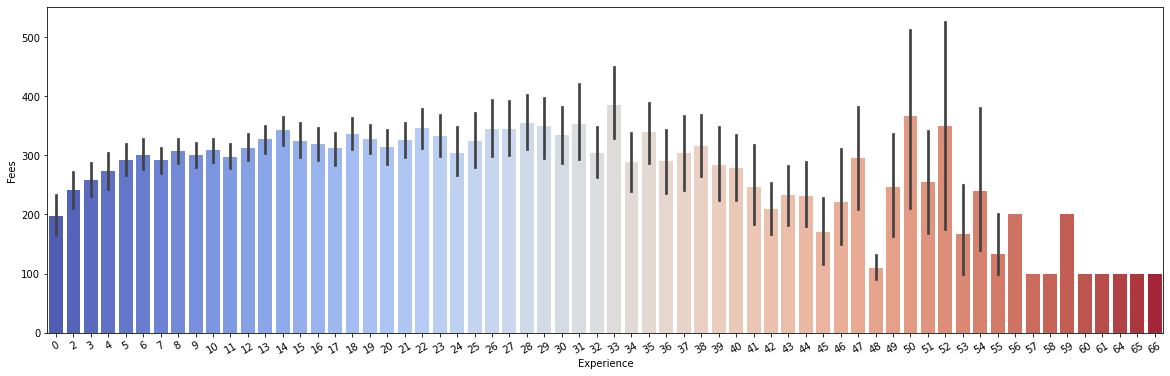

In [267]:
plt.figure(figsize=(20,6))
sns.barplot(x='Experience',y='Fees',data=df,palette='coolwarm')
plt.xticks(rotation=30)
plt.show()

##### Observation:
           From above ,we observed that from 47 years experience to 52 years the doctors charged high fees.

In [315]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col].astype(str))

## Summary Statistics

In [316]:
df.describe()

,Qualification,Experience,Rating,Profile,Fees,City,Area
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,674.118101,17.303976,42.217245,2.441872,307.944640,3.061231,410.120282
std,403.307479,11.142798,47.340934,1.658014,190.920373,2.328070,255.174855
min,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,349.000000,9.000000,0.000000,1.000000,150.000000,1.000000,195.000000
50%,625.000000,14.000000,0.000000,2.000000,300.000000,3.000000,404.000000
75%,1043.000000,23.000000,96.000000,4.000000,500.000000,5.000000,622.000000
max,1419.000000,66.000000,100.000000,5.000000,950.000000,9.000000,865.000000


##### Observation:
   1. The minimum fees charged by doctor is 5 rupees and maximum is 950 rupees.
   2. In Rating column, mean is greater than median thats why it is slightly right skewed.

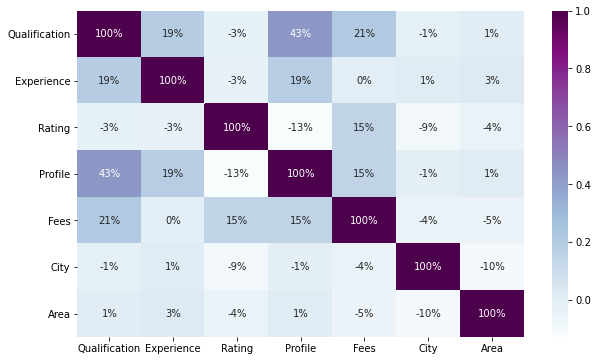

In [288]:
#Checking Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='BuPu')
plt.show()

##### Observation:
 
    1.Qualification is moderately correlated with Profile, Experience and Fees.
    
    2.Rating and Profile is positively correlated with target variable i.e. Fees.
    
    3.Experience and Profile also has a positive correlation.

Qualification       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Experience       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Rating            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Profile          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Fees             AxesSubplot(0.766379,0.749828;0.133621x0.130172)
City                AxesSubplot(0.125,0.593621;0.133621x0.130172)
Area             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
dtype: object

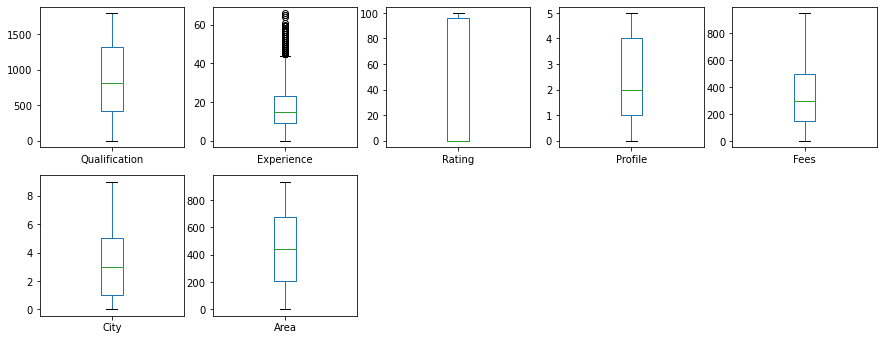

In [289]:
#Now we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

##### Observation:
 
     1.Clearly some outliers are present in Experience column.

### Removing Outliers

In [291]:
df.loc[df['Experience']>40,'Experience'] = np.mean(df["Experience"])

Qualification       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Experience       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Rating            AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Profile          AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Fees             AxesSubplot(0.766379,0.749828;0.133621x0.130172)
City                AxesSubplot(0.125,0.593621;0.133621x0.130172)
Area             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
dtype: object

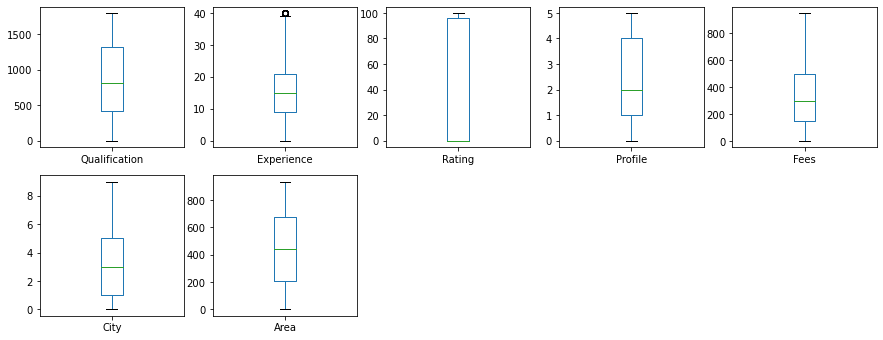

In [292]:
#Now again we will check for outliers using boxplot
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

##### Observation:

       We can see that outliers have been removed from Experience column.

### Skew Analysis

In [293]:
df.skew()

Qualification    0.169204
Experience       0.696573
Rating           0.241674
Profile          0.088789
Fees             0.751870
City             0.036072
Area             0.105132
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175D64B3AF0>,
      dtype=object)

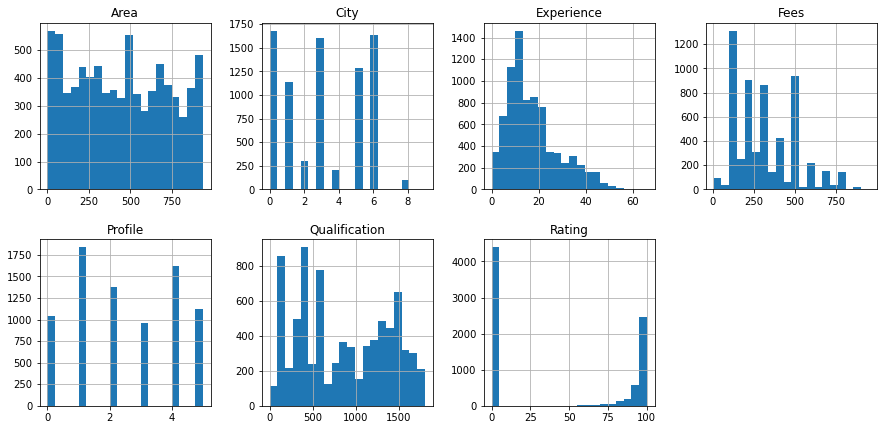

In [264]:
df.hist(figsize=(15,15), layout=(4,4), bins=20)

##### Observation:
   
    We can see that Experience and Fees are slightly right skewed rest all the data is normally distributed.

In [317]:
#Seprate the input and output variable
df_x=df.drop(columns=["Fees"])
y=df[["Fees"]]

In [318]:
#Bringing every column to common scale using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(df_x)
df_x=pd.DataFrame(x,columns=df_x.columns)

In [319]:
#Importing all the model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [320]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.20,random_state=45)


In [299]:
df.fillna(-1, inplace=True)

In [321]:
#All Algorithms by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
       Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('*'*100)
    print('\n')      

Score of LinearRegression() is: 0.07976418916099359
MAE: 148.08706947120527
MSE: 32988.8925542909
RMSE: 181.6284464347226
R2 score: 0.0771133786358732
****************************************************************************************************


Score of SVR() is: 0.05987598693550056
MAE: 142.0534943207616
MSE: 33207.71476228925
RMSE: 182.22984048253252
R2 score: 0.07099167910059223
****************************************************************************************************


Score of DecisionTreeRegressor() is: 0.9984215589100772
MAE: 174.05979323833475
MSE: 58901.68575952314
RMSE: 242.69669499093544
R2 score: -0.6478145689127477
****************************************************************************************************


Score of KNeighborsRegressor() is: 0.37576673015815354
MAE: 142.43269069572509
MSE: 34638.37146689019
RMSE: 186.11386693873777
R2 score: 0.030968088424785822
************************************************************************************

In [322]:
#Cross Validate All Algorithms by using loop
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
       Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]

for m in model:
    score=cross_val_score(m,df_x,y,cv=10,scoring='r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('*'*100)
    print('\n')

Model: LinearRegression()
Score: [0.0714693  0.09761315 0.09594575 0.06275763 0.08216831 0.07076487
 0.07196827 0.06355333 0.07063426 0.07497377]
Mean Score: 0.07618486269597127
Standard deviation: 0.011519464622347536
****************************************************************************************************


Model: SVR()
Score: [0.07363356 0.08236135 0.07817401 0.02962063 0.06511856 0.07735962
 0.04658355 0.01391504 0.04076895 0.08920693]
Mean Score: 0.05967422032422574
Standard deviation: 0.024067203024801274
****************************************************************************************************


Model: DecisionTreeRegressor()
Score: [-0.7374757  -0.39927294 -0.72987987 -0.60022167 -0.44885494 -0.45650592
 -0.40944327 -0.58491573 -0.65206572 -0.64044051]
Mean Score: -0.5659076255179702
Standard deviation: 0.12196635289912341
****************************************************************************************************


Model: KNeighborsRegressor()
Scor

### Random Forest Regressor giving best score so I choose this as final model.

In [323]:
#Using GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[10,100,200,400] ,'max_depth':[4,5,10,15,20]}
rfr=RandomForestRegressor()

clf=GridSearchCV(rfr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 10, 'n_estimators': 400}


In [324]:
#Using Random Forest Regressor with its best parameter

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=10)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('R2 score:',r2_score(y_test,y_pred))
print('\n') 

Score: 0.44710462786256944


Mean absolute error: 131.26200608449713
Mean squared error: 28579.07212123998
Root Mean Squared Error: 169.05345935898495


R2 score: 0.20048109319564844




##### Now R2 score increases by doing hyperparameter tunning.

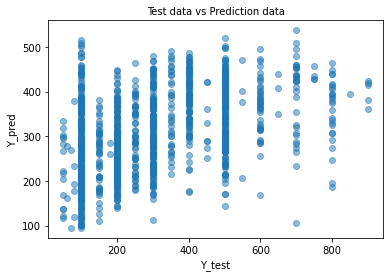

In [326]:
#Plotting between test data and predictions
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.title('Test data vs Prediction data',fontsize=10)
plt.show()

### Saving the model


In [329]:
#From above we see RandomForestRegressor is performing better so we will use it to make our final predictions.
Fees_pred=rf.predict(df_test)

In [330]:
#Dataframe for Doctor Fees prediction
Fees_pred=pd.DataFrame(Fees_pred,columns=["Fees"])

In [331]:
Fees_pred.to_csv('Doc_Fees_Predictions.csv',index=False)